In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat
from diffusion_map import diffusion_map
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE
from mpl_toolkits.mplot3d.axes3d import Axes3D

**Most important parameter** is `n_components` (or `dim` for diffusion map) for all of these — this is the dimension of the embedded space.
#### Method-specific parameters:
- PCA (none)
- Isomap 
    - n_neighbors = number of neighbors to consider when constructing graph (default 5)
- LLE
    - n_neighbors = number of neighbors to consider when constructing graph (default 5)
- t-SNE
    - perplexity = continuous measure of nearest neighbors (default 30, suggested \[5, 50\])
    - early_exaggeration = controls how close together original clusters become in the embedded space (default 12)
    - learning_rate = step size for optimization problem. "If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers." (default 200, suggested \[10, 1000\])
- Diffusion map (custom code)
    - epsilon = size of ball within which to look for neighbors
    - delta = accuracy of embedding; determines the power for the stochastic matrix (default 0.2)
    - alpha = parameter for dealing with nonuniform data (default 0, suggested 0, 1/2, or 1)

## Load data and set up functions

In [2]:
base_scurve = loadmat('../data/dataset1.mat')['data3']
emojis = loadmat('../data/dataset3.mat')['data3']

noisy_scurves = {}
for amt in np.around(np.linspace(0.1, 0.45, num=8), decimals=2):
    noisy_scurves[amt] = loadmat(f'../data/dataset2_{amt}.mat')['data3']

In [3]:
def plot_methods(pca, iso, lle, sne, dmp, vangles={}, saveme=None):
    k = pca.shape[1]  # get embedding dimension (should be the same for all)

    if k == 2:
        fig, axes = plt.subplots(figsize=(8, 12), ncols=2, nrows=3)

        axes[0,0].scatter(pca[:,0], pca[:,1], '.b')
        axes[0,0].set_title('PCA')

        axes[1,0].scatter(iso[:,0], iso[:,1], '.b')
        axes[1,0].set_title('Isomap')

        axes[0,1].scatter(lle[:,0], lle[:,1], '.b')
        axes[0,1].set_title('LLE')

        axes[1,1].scatter(sne[:,0], sne[:,1], '.b')
        axes[1,1].set_title('t-SNE')

        axes[2,0].scatter(dmp[:,0], dmp[:,1], '.b')
        axes[2,0].set_title('Diffusion map')

        axes[2,1].axis('off')
    elif k == 3:
        fig = plt.figure(figsize=(8, 12))

        ax = fig.add_subplot(3, 2, 1, projection='3d')
        ax.scatter(pca[:,0], pca[:,1], pca[:,2], '.b')
        ax.set_title('PCA')
        if 'pca' in vangles: ax.view_init(elev=vangles['pca'][0], azim=vangles['pca'][1])

        ax = fig.add_subplot(3, 2, 2, projection='3d')
        ax.scatter(iso[:,0], iso[:,1], iso[:,2], '.b')
        ax.set_title('Isomap')
        if 'iso' in vangles: ax.view_init(elev=vangles['iso'][0], azim=vangles['iso'][1])
        
        ax = fig.add_subplot(3, 2, 3, projection='3d')
        ax.scatter(lle[:,0], lle[:,1], lle[:,2], '.b')
        ax.set_title('LLE')
        if 'lle' in vangles: ax.view_init(elev=vangles['lle'][0], azim=vangles['lle'][1])
        
        ax = fig.add_subplot(3, 2, 4, projection='3d')
        ax.scatter(sne[:,0], sne[:,1], sne[:,2], '.b')
        ax.set_title('t-SNE')
        if 'sne' in vangles: ax.view_init(elev=vangles['sne'][0], azim=vangles['sne'][1])
        
        ax = fig.add_subplot(3, 2, 5, projection='3d')
        ax.scatter(dmp[:,0], dmp[:,1], dmp[:,2], '.b')
        ax.set_title('Diffusion map')
        if 'dmp' in vangles: ax.view_init(elev=vangles['dmp'][0], azim=vangles['dmp'][1])
        
        fig.add_subplot(3, 2, 6).axis('off')
    else: raise RuntimeError(f'embedded dimension must be 2 or 3, was {k}')

    if saveme is not None: plt.savefig(saveme) 
    plt.show()

## Dataset 1: Normal S-curve

In [4]:
k = 3  # embedding dimension
pca = PCA(n_components=k).fit_transform(base_scurve)
iso = Isomap(n_components=k).fit_transform(base_scurve)
lle = LocallyLinearEmbedding(n_components=k).fit_transform(base_scurve)
sne = TSNE(n_components=k, early_exaggeration=1).fit_transform(base_scurve)
dmp = diffusion_map(base_scurve, eps=0.1, alpha=1, dim=k)

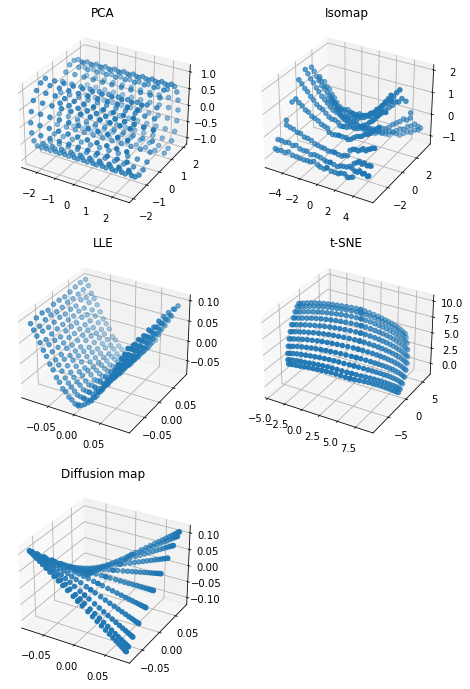

In [5]:
plot_methods(pca, iso, lle, sne, dmp, saveme=f'../pics/{k}d_scurve.png')

## Dataset 2: Noisy S-curves

At what point will noise destroy all the methods?

In [17]:
k, idx = 3, 0.45  # embedding dimension, noise amount
pca = PCA(n_components=k).fit_transform(noisy_scurves[idx])
iso = Isomap(n_components=k, n_neighbors=10).fit_transform(noisy_scurves[idx])
lle = LocallyLinearEmbedding(n_components=k, n_neighbors=10).fit_transform(noisy_scurves[idx])
sne = TSNE(n_components=k, early_exaggeration=1).fit_transform(noisy_scurves[idx])
dmp = diffusion_map(noisy_scurves[idx], eps=0.5, alpha=0, dim=k)

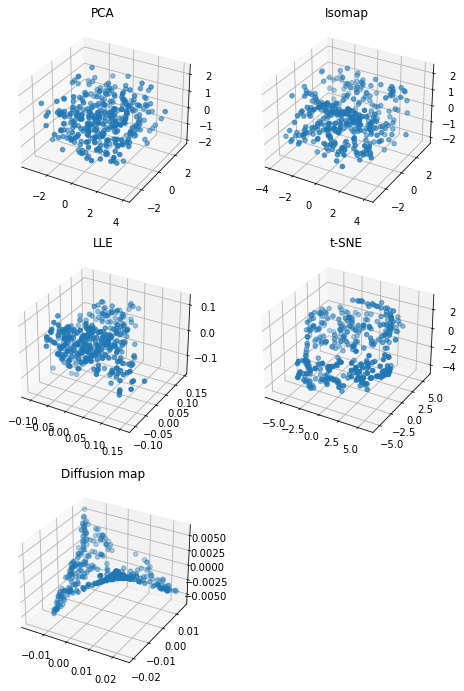

In [18]:
vangs = {'lle' : (90, 0)}
plot_methods(pca, iso, lle, sne, dmp, vangles={}, saveme=f'../pics/noisy_scurve{idx}.png')

## Dataset 3: Emoji dataset

In [10]:
k = 3
pca = PCA(n_components=k).fit_transform(emojis)
iso = Isomap(n_components=k).fit_transform(emojis)
lle = LocallyLinearEmbedding(n_components=k, n_neighbors=5).fit_transform(emojis)
sne = TSNE(n_components=k).fit_transform(emojis)
dmp = diffusion_map(emojis, alpha=1, delta=0.2, dim=k)

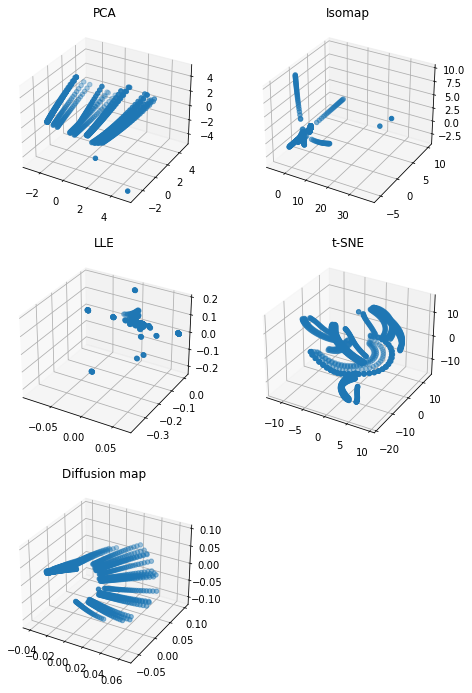

In [12]:
plot_methods(pca, iso, lle, sne, dmp, saveme='../pics/emoji.png')